# การประเมิน Model (Model Evaluation)
เกี่ยวข้องกับการทดสอบหรือประเมินประสิทธิภาพความแม่นยำ Model สำหรับระบบ ML แบบ Classification

In [1]:
#Workshop 
#Binary Confusion Matrix

#แสดงตัวอย่างการประเมินแบบ binary classification 

#create model ... สมมติว่าสร้างแล้ว
#model.fit(X, y)
#model.score(X, y) คำนวณความแม่นยำ
#y_pred = model.predict(X_test) ทำการทำนาย

#ค่า Label และความหมาย 0=Bad, 1=Good
y_true = [0,1,0,1,0,0,1,0,0,1]       #ค่า Label จริงของข้อมูล

#Label ที่ได้จากการทำนายของ Model (ผลการ Predict)
y_pred = [0,1,0,1,0,1,1,0,1,0]      

#y_true และ y_pred ต้องมีจำนวนข้อมูลเท่ากัน 


#ลองคำนวณค่าความแม่นยำด้วยมือ (Precision Positive)

#ดูว่าที่ Model ทำนายถูกต้องว่าเป็น TP (Label=1) มีเท่าใด คำตอบคือ 3
#ดูผลทำนายที่ Label=1 ทั้งหมด (TP+FP) คำตอบคือ 5 

#Precision Positive คือ 3/5 = 0.6 หรือ 60%

In [2]:
#ใช้ scikit learn นับ 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

#สั่งคำนวณและแสดงผลลัพธ์

y_targets = ['Bad', 'Good']  #แทนค่า 0 และ 1 ตามลำดับ ให้ดูง่ายขึ้น

print('Accuracy Score:', accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred, target_names=y_targets))      

cm = confusion_matrix(y_true, y_pred)
print(cm)

Accuracy Score: 0.7
              precision    recall  f1-score   support

         Bad       0.80      0.67      0.73         6
        Good       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10

[[4 2]
 [1 3]]


In [3]:
#ผลลัพธ์ ได้ค่า 4 2 1 3

In [5]:
#คำนวณหาค่าประสิทธิภาพจาก TP TN FP FN
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
TN, FP, FN, TP

(4, 2, 1, 3)

In [7]:
precision_p = TP/(TP+FP)
precision_n = TN/(TN+FN)
recall_p = TP/(TP+FN)
recall_n = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:', accuracy)
print('Precision (Positive or Good):', precision_p)
print('Precision (Negative or Bad):', precision_n)
print('Recall (Positive or Good):', recall_p)
print('Recall (Negative or Bad):', recall_n.round(2))

#จะได้ค่าเดียวกับที่ได้จาก scikit-learn

Accuracy: 0.7
Precision (Positive or Good): 0.6
Precision (Negative or Bad): 0.8
Recall (Positive or Good): 0.75
Recall (Negative or Bad): 0.67


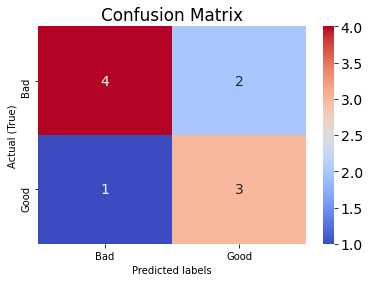

In [8]:
#Confusion Matrix Graphic
#เป็น Text อาจจะดูยากเนื่องจากไม่มีข้อความ Label กำกับ และไม่สวยงาม
#สามารถใช้ Seaborn Heatmap และ scikit-plot

import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5, 4                #ขนาด (กำหนดหรือไม่ก็ได้)
plt.rcParams.update({'font.size':14})                #ความสูงอักษร (ไม่ต้องกำหนดก็ได้)

cm = confusion_matrix(y_true, y_pred)                #คำนวณค่า Confusion Matrix

sns.heatmap(cm, annot=True, ax = ax, cmap="coolwarm")  #เฉดสีออกโทน ฟ้า-แดง
y_targets = ['Bad','Good']                             #Label กำกับ ถ้าไม่กำหนด จะแสดง 0 1
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)'); 
ax.set_title('Confusion Matrix');                      #Title
ax.xaxis.set_ticklabels(y_targets)                     #label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets)                     #label กำกับแกน y

plt.show()

In [9]:
#scikit-plot (confusion matrix)
#ใช้คำสั่พงล็อตโดยเฉพาะ ต้องติดตั้ง library scikit-plot เสียก่อนดังนี้

#$ conda install -c conda-forge scikit-plot

#โค้ดสร้าง Confusion Matrix 
#import scikitplot as skplot
#y_true และ y_pred ใช้ workshop ที่ผ่านมา
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()

In [10]:
#Confusion Matrix 3 Labels 
#ตัวอย่างคือ Cat(0), Dog(1), Bird(2)

#create model...
#model.fit(X, y)
#model.score(X, y)
#y_pred = model.predict(X_test)
#0=Cat, 1=Dog, 2=Bird

y_targets = ['Cat','Dog','Bird']

y_true = [0,1,0,1,0,0,1,0,0,1,2,2,2,2,2]
y_pred = [0,1,0,1,0,1,1,0,1,0,2,2,2,1,2]

print('Accuracy Score: {:.3f}'.format(accuracy_score(y_true, y_pred)))

print(classification_report(y_true, y_pred, target_names=y_targets))

cm = confusion_matrix(y_true, y_pred)
print(cm)

Accuracy Score: 0.733
              precision    recall  f1-score   support

         Cat       0.80      0.67      0.73         6
         Dog       0.50      0.75      0.60         4
        Bird       1.00      0.80      0.89         5

    accuracy                           0.73        15
   macro avg       0.77      0.74      0.74        15
weighted avg       0.79      0.73      0.75        15

[[4 2 0]
 [1 3 0]
 [0 1 4]]


In [11]:
print('y_true: ',y_true)
print('y_pred: ',y_pred)

y_true:  [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2]
y_pred:  [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2]


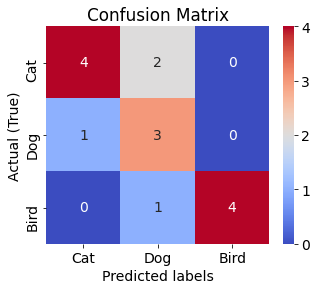

In [12]:
ax = plt.subplot()

plt.rcParams['figure.figsize'] = 5, 4 
plt.rcParams.update({'font.size':14}) 

sns.heatmap(cm, annot=True, ax = ax, cmap="coolwarm") #annot=True แสดงค่ากำกับ
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y_targets)
ax.yaxis.set_ticklabels(y_targets)

plt.show()

In [14]:
#ทดสอบแบ่งชุดข้อมูลสำหรับ train และ test ด้วย scikit-learn

import pandas as pd
df = pd.read_csv('data/simple_loan.csv')
df = df[:10]
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [15]:
X = df[['age', 'employed', 'own_house', 'credit']]   #Features
y = df.target                                        #target/label

In [16]:
#แบ่งข้อมูลเพื่อ train และประเมินทดสอบ model (test)
#โดยใช้ train_test_split()
#ในที่นี่ต้องการแบ่ง 30% ของจำนวนข้อมูลทั้งหมด ไปเป็นข้อมูลทดสอบ(test)
#กำหนด test_size = 0.3

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=48)
X_train.shape , X_test.shape

((7, 4), (3, 4))

In [17]:
X_train

,age,employed,own_house,credit
6,middle,False,n,good
9,middle,False,y,excellent
8,middle,False,y,excellent
4,young,False,n,fair
1,young,False,n,good
3,young,True,y,fair
0,young,False,n,fair


In [18]:
X_test

,age,employed,own_house,credit
7,middle,True,y,good
5,middle,False,n,fair
2,young,True,n,good


In [19]:
y_train

6     no
9    yes
8    yes
4     no
1     no
3    yes
0     no
Name: target, dtype: object

In [20]:
y_test

7    yes
5     no
2    yes
Name: target, dtype: object

In [21]:
#หากต้องการให้สุ่มได้ค่าเดิมทุกครั้ง
#ให้กำหนดค่า random_state เป็นเลขอะไรก็ได้
#เช่น โค้ดต่อไปนี้ จะรันกี่ครั้งก็ได้การแบ่งเหมือนเดิม

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [22]:
#แบ่งข้อมูลเป็น X_train, y_train, X_test, y_test(ตัวทดสอบ)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/simple_loan.csv')
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [23]:
df.shape

(17, 5)

In [24]:
df.isnull().sum()

age          0
employed     0
own_house    0
credit       0
target       0
dtype: int64

In [25]:
df.target.unique()

array(['no', 'yes'], dtype=object)

In [26]:
df.groupby('target').count()

,age,employed,own_house,credit
target,,,,
no,6,6,6,6
yes,11,11,11,11


In [27]:
#ฟังก์ชันเข้ารหัส Label encode โดยใช้ pd.factorize
def labelEncode(data, columns):
    for i in columns:
        data[i + '_'], _ = pd.factorize(data[i], sort=True)  
    
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df, feature_columns)    

df['target_'], class_names = pd.factorize(df.target)
df.sample(5)

#จะได้ข้อมูลที่เข้ารหัสเปลี่ยนจากข้อความเป็นตัวเลขแล้ว ซึ่งก็คือชื่อคอลัมน์ที่ลงท้ายด้วยขีด เช่น age_, employed_ (_ ไม่ได้มีผลอะไร แค่ตั้งชื่อตัวแปรให้ต่าง จะได้ดูง่าย ๆ)

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
16,young,True,y,fair,yes,2,1,1,1,1
2,young,True,n,good,yes,2,1,0,2,1
10,old,False,y,excellent,yes,1,0,1,0,1
5,middle,False,n,fair,no,0,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0


In [28]:
#หลังเข้ารหัส ให้ใช้คอลัมน์ที่มี _ (คอลัมน์อื่นที่ไม่มี ลบทิ้งไปก็ได้เพราะไม่ใช้แล้ว แต่ในที่นี้จะเอาไว้ เพื่อเปรียบเทียบให้เห็นภาพ)
class_names #ตรวจ class

Index(['no', 'yes'], dtype='object')

In [29]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target', 'age_', 'employed_',
       'own_house_', 'credit_', 'target_'],
      dtype='object')

In [33]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X = df[enc_columns]
X.head()

#ข้อมูลที่เป็น feature ที่ใช้ train

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1


In [34]:
#ตรวจสอบ target/label
y = df.target_
y[:5]

0    0
1    0
2    1
3    1
4    0
Name: target_, dtype: int64

In [35]:
#หากต้องการดูค่าของข้อมูลเดิม เทียบกับค่าที่เข้ารหัสแล้ว
for i in enc_columns:
    print(i[:-1]) 
    print(df[i[:-1]].unique())
    print(df[i].unique())
    print('----')

age
['young' 'middle' 'old']
[2 0 1]
----
employed
[False  True]
[0 1]
----
own_house
['n' 'y']
[0 1]
----
credit
['fair' 'good' 'excellent']
[1 2 0]
----


In [36]:
#แบ่งข้อมูลเป็น train และ test

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20) 

In [37]:
X_train.shape , X_test.shape

((11, 4), (6, 4))

In [38]:
y_train.shape , y_test.shape

((11,), (6,))

In [39]:
X_train

,age_,employed_,own_house_,credit_
13,1,1,0,0
0,2,0,0,1
2,2,1,0,2
7,0,1,1,2
6,0,0,0,2
4,2,0,0,1
9,0,0,1,0
15,1,0,0,0
12,1,1,0,2
10,1,0,1,0


In [40]:
X_test

,age_,employed_,own_house_,credit_
16,2,1,1,1
1,2,0,0,2
5,0,0,0,1
11,1,0,1,2
8,0,0,1,0
14,1,0,0,1


In [42]:
#สร้าง Model โดยใช้ X_train, y_train

from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=2)      #max_depth คือความลึกของ Decision tree
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
#ทดสอบด้วย X_test, y_test

model.score(X_test, y_test)

0.8333333333333334

In [44]:
#ความแม่นยำเฉลี่ย 83%

In [45]:
#คำนวณรายงานและ Confusion Matrix

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score -> {:.3f}' . format(model.score(X_test, y_test)))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(3))
#class_names = no, yes 

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Score -> 0.833
Accuracy Score:  0.833
              precision    recall  f1-score   support

          no       0.75      1.00      0.86         3
         yes       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

[[3 0]
 [1 2]]


In [46]:
print(y_test, '<- y_test (Actual or True data)')
print(y_pred, '<- y_predicted from the model')

16    1
1     0
5     0
11    1
8     1
14    0
Name: target_, dtype: int64 <- y_test (Actual or True data)
[1 0 0 0 1 0] <- y_predicted from the model


In [47]:
#ฟังก์ชันแสดงชื่อ label
for i in y_pred:
    print(class_names[i])

yes
no
no
no
yes
no


In [51]:
#ดูค่าความสำคัญของ Features
model.feature_importances_

array([0.    , 0.3125, 0.    , 0.6875])

In [52]:
df

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0
5,middle,False,n,fair,no,0,0,0,1,0
6,middle,False,n,good,no,0,0,0,2,0
7,middle,True,y,good,yes,0,1,1,2,1
8,middle,False,y,excellent,yes,0,0,1,0,1
9,middle,False,y,excellent,yes,0,0,1,0,1


In [53]:
#การทำนาย 
#ต้องใส่ Input ให้ตรงกับค่าที่เข้ารหัสไว้

X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]
y_predict = model.predict(X_input)
print(y_predict)

for i in y_predict:
    print('Result : {}'. format(class_names[i]))


[1 0 1 0]
Result : yes
Result : no
Result : yes
Result : no


In [54]:
#ใช้ข้อมูลจากไฟล์ CSV เป็น input
#กรณีที่ข้อมูลมีมาก ข้อมูลที่เป็น input มักถูกเก็บไว้ในไฟล์เช่นไฟล์ CSV 
#โดยในไลฟ์จะมีเพียง Features(X) เท่านั้น เนื่องจากระบบจะทำนาย Target(y) ให้

df_pred = pd.read_csv('data/simple_loan_predict.csv')
df_pred.head()

,id,name,age,employed,own_house,credit
0,101,Kob,middle,True,y,fair
1,102,Cala,old,False,n,good
2,103,Alex,old,True,n,fair
3,104,Tim,young,False,y,fair
4,105,Joy,middle,False,n,fair


In [55]:
#ระบุเฉพาะคอลัมน์ที่ต้องการ
cols = ['id','age','employed','own_house','credit']
df_pred = pd.read_csv('data/simple_loan_predict.csv', usecols=cols)
df_pred.head()

,id,age,employed,own_house,credit
0,101,middle,True,y,fair
1,102,old,False,n,good
2,103,old,True,n,fair
3,104,young,False,y,fair
4,105,middle,False,n,fair


In [56]:
feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df_pred, feature_columns)
df_pred.head()

,id,age,employed,own_house,credit,age_,employed_,own_house_,credit_
0,101,middle,True,y,fair,0,1,1,1
1,102,old,False,n,good,1,0,0,2
2,103,old,True,n,fair,1,1,0,1
3,104,young,False,y,fair,2,0,1,1
4,105,middle,False,n,fair,0,0,0,1


In [57]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X_input = df_pred[enc_columns] 
X_input.head()

,age_,employed_,own_house_,credit_
0,0,1,1,1
1,1,0,0,2
2,1,1,0,1
3,2,0,1,1
4,0,0,0,1


In [58]:
#สั่งให้ระบบทำนาย

y_predict = model.predict(X_input)
df_pred['predict'] = y_predict
df_pred

,id,age,employed,own_house,credit,age_,employed_,own_house_,credit_,predict
0,101,middle,True,y,fair,0,1,1,1,1
1,102,old,False,n,good,1,0,0,2,0
2,103,old,True,n,fair,1,1,0,1,1
3,104,young,False,y,fair,2,0,1,1,0
4,105,middle,False,n,fair,0,0,0,1,0
5,106,middle,False,y,excellent,0,0,1,0,1


In [61]:
#แสดงเฉพาะส่วนที่จำเป็น
df_pred['result'] = class_names[df_pred.predict]
columns = ['id','age','employed','own_house','credit','result']
print('Result...')
df_pred[columns]

Result...


,id,age,employed,own_house,credit,result
0,101,middle,True,y,fair,yes
1,102,old,False,n,good,no
2,103,old,True,n,fair,yes
3,104,young,False,y,fair,no
4,105,middle,False,n,fair,no
5,106,middle,False,y,excellent,yes


In [62]:
#train โดยไม่กำหนด random_state (หรือกำหนดให้แตกต่างกัน เพื่อให้การสุ่มไม่ซ้ำกัน)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8333333333333334

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [69]:
#การแบ่ง K-fold

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [70]:
for train_index, test_index in kf.split(X):       #แสดง index รายการข้อมูล ในการแบ่งแต่ละรอบ
    print(train_index, test_index)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16] [0 1 2 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16] [4 5 6 7]
[ 0  1  2  3  4  5  6  7 11 12 13 14 15 16] [ 8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 14 15 16] [11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14 15 16]


In [72]:
#ลองแบบ 2-fold

kf = KFold(n_splits=2)
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [73]:
for train_index, test_index in kf.split(X):       #แสดง index รายการข้อมูล ในการแบ่งแต่ละรอบ
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16] [0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8] [ 9 10 11 12 13 14 15 16]


In [74]:
#5-Fold Cross validation

from sklearn.model_selection import cross_val_score   

model = DecisionTreeClassifier(max_depth=3)   #กรณีกำหนด parameters

cvs = cross_val_score(model, X, y, cv=5)      #cross_val_score ไม่ต้องรัน .fit()
cvs

array([1.        , 1.        , 0.66666667, 1.        , 0.66666667])

In [75]:
#จะได้ค่า Score 5 ค่า ของแต่ละรอบ ตาม array ข้างบน

In [76]:
#นำมาหาค่าเฉลี่ย 

cvs.mean().round(4)

0.8667

In [77]:
#ได้ประสิทธิภาพเฉลี่ย 0.8667 หรือ 86.67%

In [ ]:
#ลองสร้าง Model ที่ max_depth (parameter) แตกต่างกัน แล้วรันใหม่ 
#จะได้ค่าประสิทธิภาพเฉลี่ยที่ต่างกัน แสดงว่า ค่าพารามิเตอร์มีผลกับประสิทธิภาพ model